In [3]:
import numpy as np
import matplotlib.pyplot as plt
from MulSVM import svm_loss_naive

# random, small data
N, C, d = 10, 3, 5
reg = .1 
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)

# sanity check
print('loss without regularization:', svm_loss_naive(W, X, y, 0)[0])
print('loss with regularization:', svm_loss_naive(W, X, y, .1)[0])

loss without regularization: 3.400105859508167
loss with regularization: 3.856808615791369


In [4]:
f = lambda W: svm_loss_naive(W, X, y, .1)[0]

# to check if calculated grad is correct
def numerical_grad_general(W, f):
    eps = 1e-6
    g = np.zeros_like(W)
    # flatening variable -> 1d. Then we need only one for loop
    W_flattened = W.flatten()
    g_flattened = np.zeros_like(W_flattened)
    
    for i in range(W.size):
        W_p = W_flattened.copy()
        W_n = W_flattened.copy()
        W_p[i] += eps 
        W_n[i] -= eps 
        
        # back to shape of W 
        W_p = W_p.reshape(W.shape)
        W_n = W_n.reshape(W.shape)
        g_flattened[i] = (f(W_p) - f(W_n))/(2*eps)
        
    # convert back to original shape
    return g_flattened.reshape(W.shape) 

# compare two ways of computing gradient
g1 = svm_loss_naive(W, X, y, .1)[1]
g2 = numerical_grad_general(W, f)
print('gradient difference:', np.linalg.norm(g1 - g2))
# this should be very small

gradient difference: 1.2896888294401647e-09


In [5]:
from MulSVM import svm_loss_vectorized

N, C, d = 49000, 10, 3073
reg = .1 
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)

import time 
t1 = time.time()
l1, dW1 = svm_loss_naive(W, X, y, reg)
t2 = time.time()
print('Naive     : run time:', t2 - t1, '(s)')

t1 = time.time()
l2, dW2 = svm_loss_vectorized(W, X, y, reg)
t2 = time.time()
print('Vectorized: run time:', t2 - t1, '(s)')
print('loss difference:', np.linalg.norm(l1 - l2))
print('gradient difference:', np.linalg.norm(dW1 - dW2))

Naive     : run time: 9.561431884765625 (s)
Vectorized: run time: 0.43289613723754883 (s)
loss difference: 2.2737367544323206e-13
gradient difference: 2.697372671614225e-14


In [6]:
from MulSVM import multi_svm_GD

N, C, d = 49000, 10, 3073
reg = .1 
W = np.random.randn(d, C)
X = np.random.randn(d, N)
y = np.random.randint(C, size = N)

W, loss_history = multi_svm_GD(X, y, W, reg)

iter 1/1000, loss = 1779.48011501847
iter 101/1000, loss = 248.44787562485234
iter 201/1000, loss = 53.42800569548707
iter 301/1000, loss = 38.37659454172819
iter 401/1000, loss = 41.34096687391552
iter 501/1000, loss = 38.67339163264131
iter 601/1000, loss = 41.54837137201282
iter 701/1000, loss = 39.934874586184606
iter 801/1000, loss = 39.765960441638455
iter 901/1000, loss = 39.93816300560933


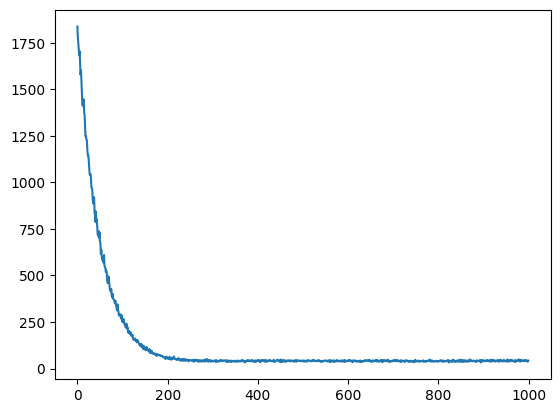

In [7]:
# plot loss as a function of iteration
plt.plot(loss_history)
plt.show()